In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0";

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

<Figure size 432x288 with 0 Axes>

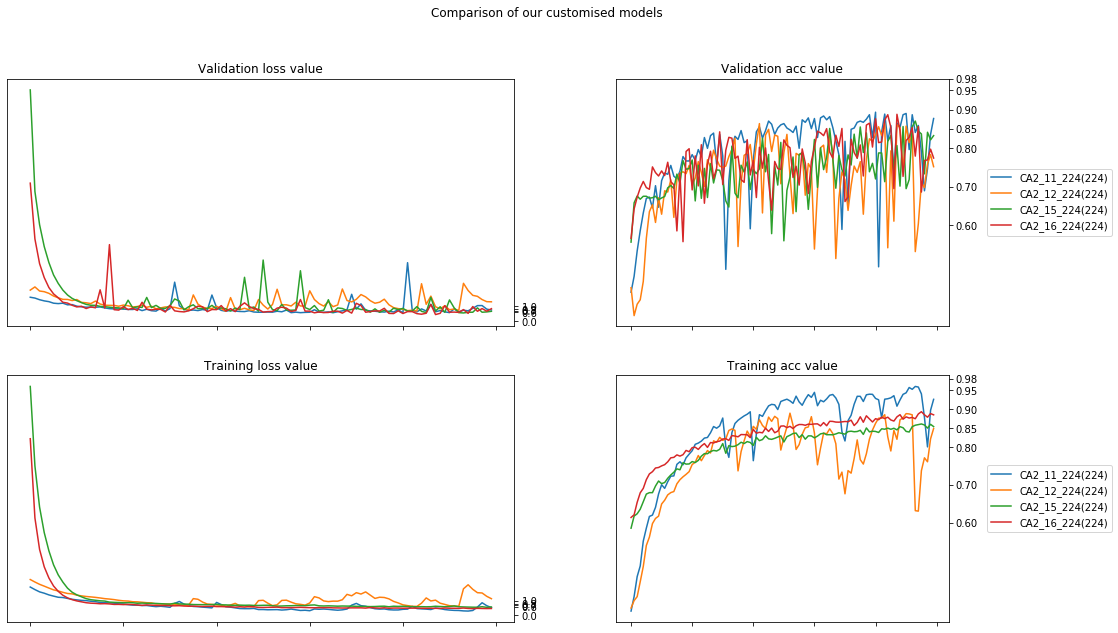

In [3]:
#######################################################
# Model Comparison
# 11/09/2019 
#
#######################################################
import matplotlib.pyplot as plt
import os
import pandas as pd


# import sys

# defining global variables
DEBUG_MODE = False
optmz       = 'adam'    # optimizers.RMSprop(lr=0.0001)

def loadcsv(path, prefix=None):
    # Put files into lists and return them as one list of size 4
    csv_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if file.lower().endswith('csv')])
    return csv_files

def plotMetric(subindex, arr, label, yticks, title, showLegend=True):
    ax = plt.subplot(subindex)
    ax.yaxis.tick_right()
    plt.plot(arr, label=label)
    plt.yticks(yticks) 
    plt.title(title,fontsize=12)         
    box = ax.get_position()
    ax.set_xticklabels([]) 
    if (showLegend):
        ax.set_position([box.x0, box.y0, box.width * 0.90, box.height])
        ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

def plotAndCompare(csv_files, title="", min_rng=0, max_rng= 999):
    f_map = {'0': "Base CNN, E", '1': "CNN with dropout & regularisation, E", '90': "VGG16", '91': 'ResNet', '92': 'InceptionV3'}
    # f_extra = {'01': 'Normalised 0-1', '0': 'Standardised mean 0, stdev 1'}
    plt.figure(figsize=(20,10))
    plt.suptitle(title)
    for f in csv_files:
        records = pd.read_csv(f) 
        fileNoExt = os.path.splitext(f)[0].replace("./", "")
        f_arr = f.replace(".csv", "").split("_")
        f_index = f_arr[1]
        f_index_int = int(f_index)

        if (f_index_int < min_rng or f_index_int > max_rng): continue

        f_size = int(f_arr[2].split(".")[0]) if len(f_arr) == 3 else "NA"
        label = f_map.get(f_index, fileNoExt) + "(" + str(f_size) + ")" 
        plotMetric(221, records['val_loss'], label, [0.00, 0.60, 0.70, 0.80, 1.0], 'Validation loss value', False)
        plotMetric(222, records['val_acc'], label, [0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.98], 'Validation acc value', True)
        plotMetric(223, records['loss'], label, [0.00, 0.60, 0.70, 0.80, 1.0], 'Training loss value', False)
        plotMetric(224, records['acc'], label, [0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.98], 'Training acc value', True)
    plt.show()


def main():
    csv_files = loadcsv('./')
    plt.figure()
    # plotAndCompare(csv_files, 'Comparison of popular pretrained models', min_rng = 90)
    plotAndCompare(csv_files, 'Comparison of our customised models', max_rng = 89)
    # plotAndCompare(csv_files, 'Comparison of our customised models', max_rng = 0)
main()